In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import plotly.plotly as py
import plotly.graph_objs as go

import requests

from utils import utils_v2
plt.rcParams['figure.figsize'] = (15, 7) 
%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data.drop('Timestamp',axis=1,inplace = True)
data['Date'] = data.timestamp.dt.date
data = data.set_index('timestamp');

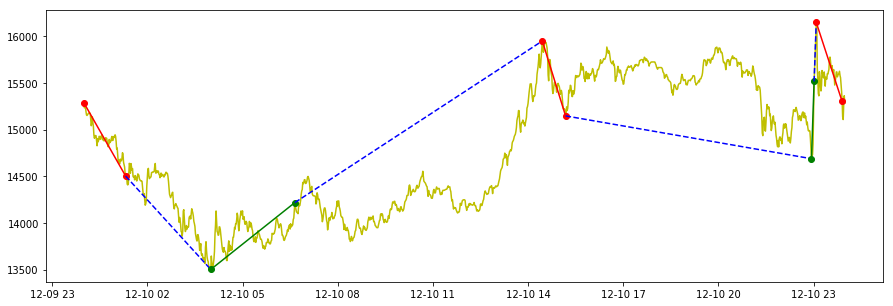

In [4]:
date = '2017 Dec 10'
    
stock_series = data.loc[date]['Weighted_Price']

DCA, CPA = utils_v2.get_events(stock_series,threshold = 0.05)
    
utils_v2.plot_events(stock_series,DCA,CPA)

In [5]:
DDCstar, DDCstar_time  = utils_v2.theoretical_CP(stock_series, DCA, CPA, threshold = 0.05)

In [6]:
values_up,index_up,values_down, index_down, OS_values, OS_index = utils_v2.data_plot(stock_series, DDCstar, DDCstar_time, DCA, CPA)

In [7]:

r = requests.get('https://plot.ly/~manuel.morais/82.json')

t = r.json()

layout = t['layout']

In [8]:
t['data'][0]['x']=stock_series.index
t['data'][0]['y']=stock_series.values
t['data'][1]['x']=OS_index
t['data'][1]['y']=OS_values
t['data'][2]['x']=index_down
t['data'][2]['y']=values_down
t['data'][3]['x']=index_up
t['data'][3]['y']=values_up

In [9]:
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Price',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]}]),
            dict(label = 'Overshoot',
                 method = 'update',
                 args = [{'visible': [False, True, False, False]}]),
            dict(label = 'Down',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]}]),
            dict(label = 'Up',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]}])
        ]),
    )
])


In [10]:
t['layout']['updatemenus'] = updatemenus

In [11]:
fig = dict(data=t['data'],layout=t['layout'])
py.iplot(fig, filename = "New")

In [12]:
table = pd.DataFrame(columns=['NDC','PC','Median_OSV_down','Median_OSV_up','Median_OSV_overall','Median_TM_up','Median_TM_down','Median_TM_overall','Median_T_overall','Median_T_down','Median_T_up','Median_R_DC_down','Median_R_DC_up','Median_R_DC_overall','LenC','Mean_LenC'])

In [13]:
table, OSV, T, TM = utils_v2.event_summary(stock_series,DCA,CPA,table,threshold =  0.05)

In [14]:
table

,LenC,Mean_LenC,Median_OSV_down,Median_OSV_overall,Median_OSV_up,Median_R_DC_down,Median_R_DC_overall,Median_R_DC_up,Median_TM_down,Median_TM_overall,Median_TM_up,Median_T_down,Median_T_overall,Median_T_up,NDC,PC
2017-12-10,9.529406,2.382352,-1.008673,1.17349,1.720442,-1.008673,0.000006,1.720442,-1.958239,2.161882,2.806464,06:14:30,06:14:30,05:18:00,5,1.056343


In [15]:
subA_DCA, subA_CPA = utils_v2.get_sub_events(stock_series, DCA, CPA, threshold = 0.05)

In [16]:
sub_DDCstar, sub_DDCstar_time  = utils_v2.theoretical_CP(stock_series, subA_DCA[0], subA_CPA[0], threshold = 0.05/4)

In [17]:
sub_values_up,sub_index_up,sub_values_down, sub_index_down, sub_OS_values, sub_OS_index = utils_v2.data_plot(stock_series, sub_DDCstar, sub_DDCstar_time, subA_DCA[0], subA_CPA[0])

In [18]:
sub_trace_up_trend = go.Scatter(
         x = sub_index_up,
         y = sub_values_up,
         mode = 'lines+markers',
         name = 'sub Up Turn',
         line = dict(
                color = 'rgb(0,150,0)' 
         )
    )

sub_trace_down_trend = go.Scatter(
        x = sub_index_down,
        y = sub_values_down,
        mode = 'lines+markers',
        name = 'sub Down Turn',
        line = dict(
                color = 'rgb(150,0,0)' 
         )
    )

sub_trace_overshoot = go.Scatter(
         x = sub_OS_index,
         y = sub_OS_values,
         name = 'sub Overshoot',
         line = dict(
                color = 'rgb(180,180,180)',
                dash = 'dash'
         )
    )

dt = [sub_trace_overshoot, sub_trace_down_trend, sub_trace_up_trend]

fig=dict(data=dt,layout=layout)

py.iplot(fig, filename = "New",fileopt='append')
